In [ ]:
#Linear regression Building model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/new_insurance_data (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
# EDA
#1.null values
# 2.dupliactes
# 3.outliers
# 4.label encoding

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#df.drop_duplicates().sum()

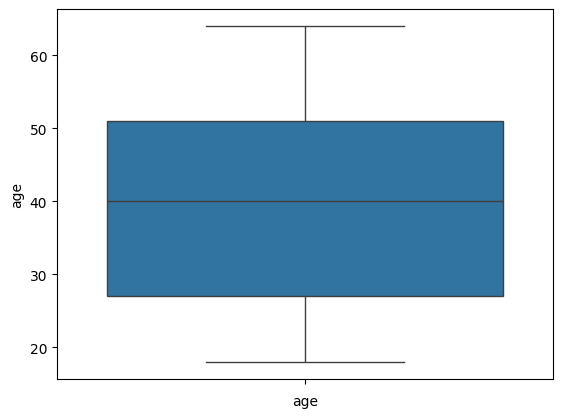

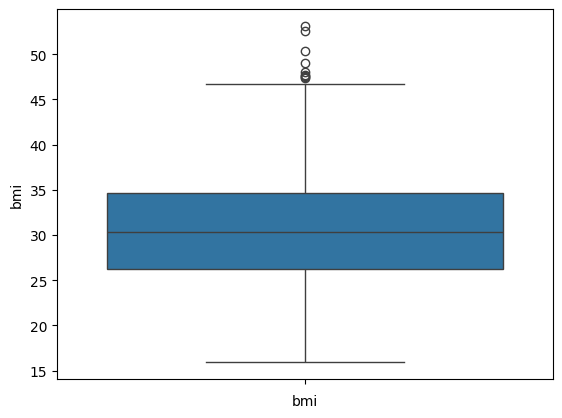

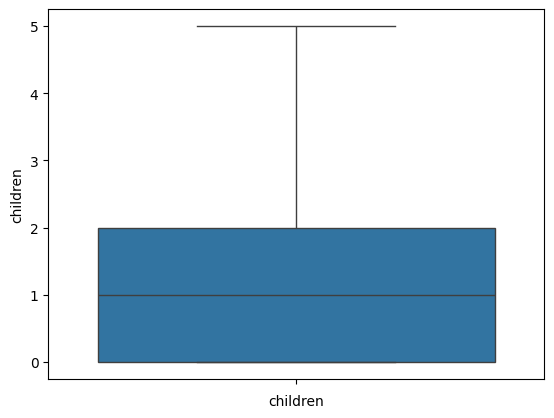

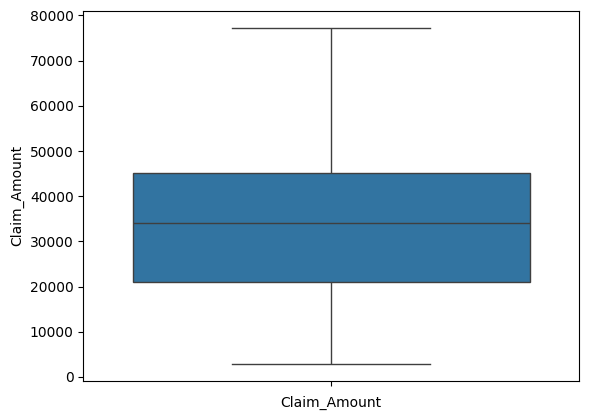

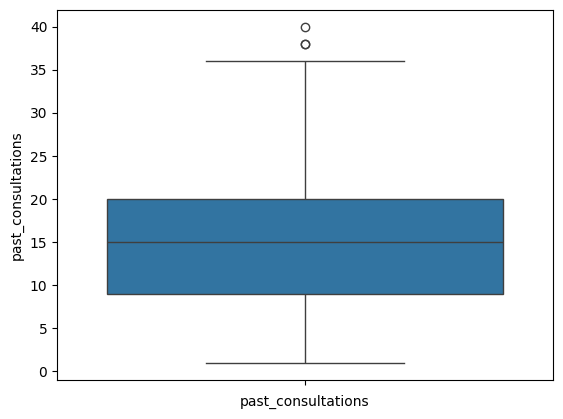

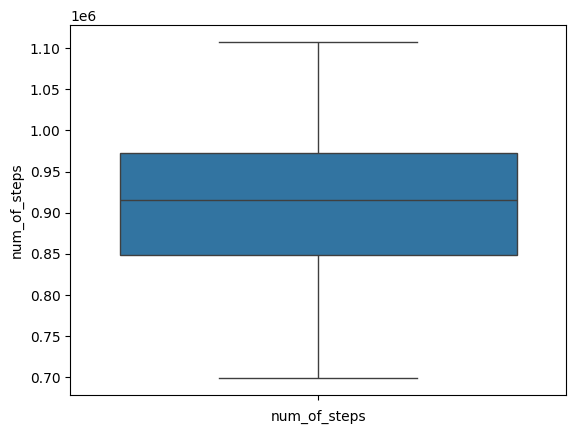

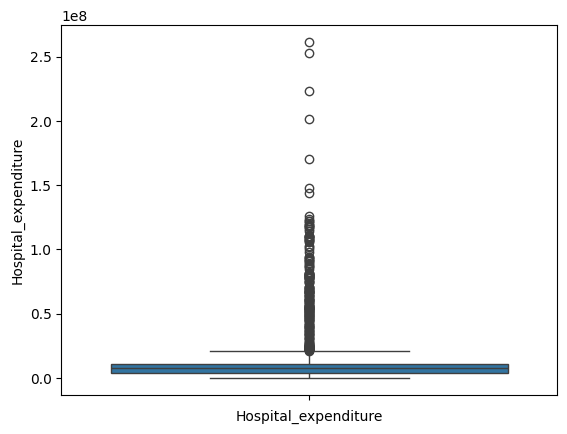

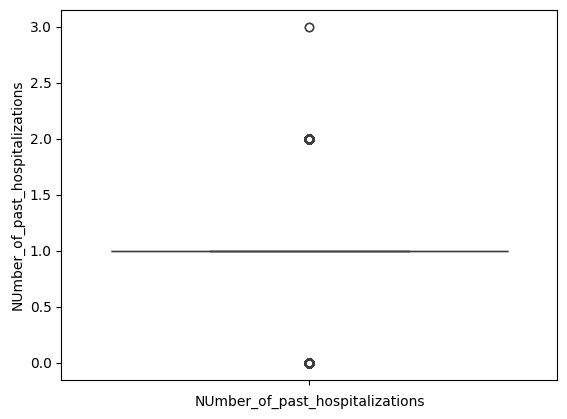

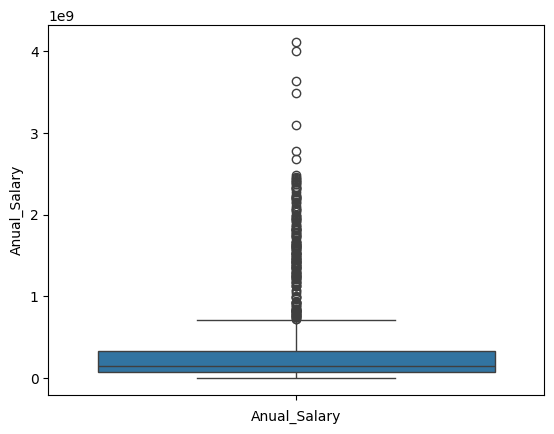

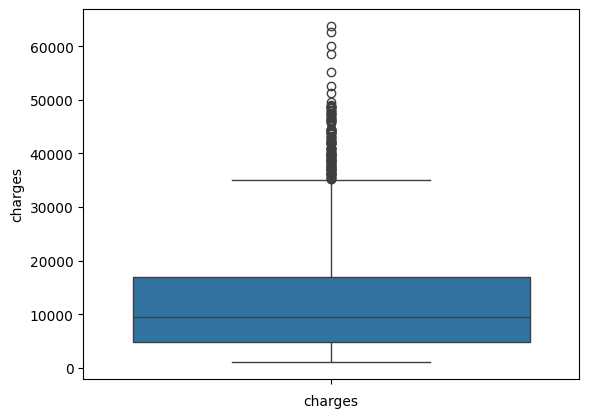

In [ ]:
for col in df.columns:
  if(df[col].dtype!='object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
out_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR= Q3 -Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in df.columns:
  if(df[col].dtype=='object'):
    df[col]=le.fit_transform(df[col])

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2,18767.73770
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3,18955.22017
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 1050
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              986 non-null    float64
 1   sex                              986 non-null    int64  
 2   bmi                              986 non-null    float64
 3   children                         986 non-null    float64
 4   smoker                           986 non-null    int64  
 5   Claim_Amount                     986 non-null    float64
 6   past_consultations               986 non-null    float64
 7   num_of_steps                     986 non-null    float64
 8   Hospital_expenditure             986 non-null    float64
 9   NUmber_of_past_hospitalizations  986 non-null    float64
 10  Anual_Salary                     986 non-null    float64
 11  region                           986 non-null    int64  
 12  charges                   

In [ ]:
#Statement :- Based of 12 columns build a model which will predict the charges value
x=df.drop('charges',axis=1)
y=df['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3


In [ ]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1036,18767.73770
1041,18955.22017
1046,19107.77960
1048,19199.94400


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
804,51.0,0,36.385,3.0,0,16444.867890,17.0,934408.0,1.127292e+07,1.0,1.537927e+08,1
1036,43.0,1,20.130,2.0,1,44184.654140,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2
265,26.0,0,29.920,2.0,0,25158.216300,14.0,846439.0,7.055674e+06,1.0,5.235216e+07,2
7,18.0,1,41.140,0.0,0,46770.585330,12.0,706423.0,4.486741e+06,0.0,9.719378e+07,2
534,41.0,0,31.635,1.0,0,48195.738090,4.0,887149.0,7.173072e+06,1.0,1.410664e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
320,32.0,0,29.590,1.0,0,4414.416523,9.0,835450.0,1.444796e+06,1.0,2.527777e+07,2
28,18.0,0,31.350,0.0,0,33972.562340,3.0,743440.0,8.005326e+06,0.0,4.979936e+06,2
540,43.0,1,32.600,2.0,0,21163.304570,11.0,879690.0,5.772457e+06,1.0,1.119128e+08,3
60,19.0,0,17.800,0.0,0,48102.917770,13.0,745381.0,7.647986e+06,0.0,1.416630e+07,3


In [ ]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
654,51.0,1,31.635,0.0,0,42322.35008,16.0,914300.0,3.888710e+06,1.0,1.012005e+08,1
810,51.0,1,24.415,4.0,0,32063.00227,15.0,933556.0,7.028003e+06,1.0,1.532904e+08,1
354,29.0,0,32.110,2.0,0,30738.30218,2.0,846142.0,5.903368e+06,1.0,1.167998e+08,1
939,19.0,0,21.700,0.0,1,51149.48177,13.0,954114.0,5.207775e+06,1.0,2.314991e+08,3
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
508,38.0,0,27.835,2.0,0,21949.64082,15.0,880238.0,3.495134e+06,1.0,6.593671e+07,0
363,31.0,1,27.645,2.0,0,34741.33485,21.0,848272.0,6.785796e+06,1.0,9.201589e+07,0
878,52.0,0,46.750,5.0,0,44081.28609,7.0,953905.0,8.658220e+06,1.0,2.131959e+08,2
487,41.0,0,28.050,1.0,0,45040.74243,16.0,898487.0,4.054957e+06,1.0,1.402649e+08,2


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

NameError: name 'model' is not defined

In [ ]:
model_answers=model.predict(x_test)

In [ ]:
model_answers

array([ 8976.28802795, 10740.05581157,  5700.76250753, 14396.1189182 ,
         253.80562859,  1194.79182933,  6690.71122684,  7098.55291877,
        3298.45608632,  7987.49439027, 11136.55989314, 10667.43273536,
        1829.36201243,  4629.66501831,  2733.22842935,  4722.38770323,
       11296.851729  , 10141.63761875,  5656.30265771,  5842.87944965,
        9007.26871866,  7182.3501929 ,  9269.25490687,  9083.55173062,
        5665.23958823, 14243.52031899,  4997.269818  ,  2059.22186053,
        7151.41443286,  6045.53630812,  4998.94433914,  6156.03442355,
       15025.01483191,  2357.44638322,  3230.85273707, 11418.94537629,
       13224.43744709,  9761.439902  , 10074.86914051, 16500.16779729,
       13097.09919971,  2779.09098776, 13344.86709209,  5068.86804909,
       12096.74347024,  9406.26520153,  2974.72240138,  2091.70505258,
        5711.11970398,  5058.97119977,  8245.43759317,  8587.17806612,
        4413.41562753,  1533.31301397, 10568.78125203,  5237.27446628,
      

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(model_answers,y_test)*100  #r2_score --> its a method used to check closeness between two variables

NameError: name 'r2_score' is not defined

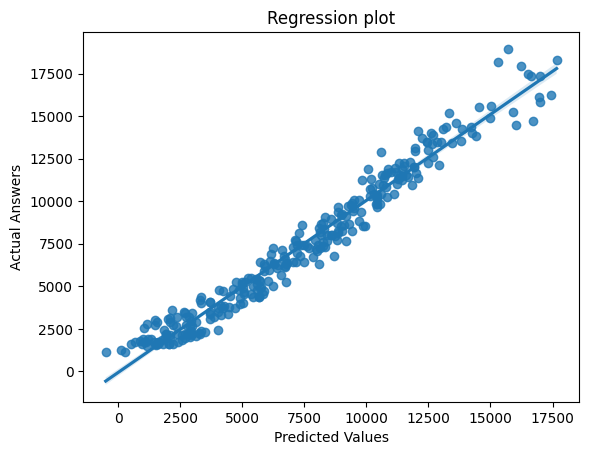

In [ ]:
sns.regplot(x=model_answers,y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Answers')
plt.title("Regression plot")
plt.show()

In [ ]:
Ajinkya=[27,1,25.600,0.0,0,30825.190070,9.0,821360.0,5.923489e+06,0.0,7.490390e+07,2]

In [ ]:
aj_data=pd.DataFrame(columns=x_train.columns)
aj_data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region


In [ ]:
aj_data.loc[0]=Ajinkya

In [ ]:
aj_data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,27.0,1.0,25.6,0.0,0.0,30825.19007,9.0,821360.0,5923489.0,0.0,74903900.0,2.0


In [ ]:
answer=model.predict(aj_data)

In [ ]:
answer

array([5489.54987324])